In [13]:
def divide_into_tiles(image, num_rows, num_cols):
    height, width, _ = image.shape
    tiles_height = height // num_rows
    tiles_width = width // num_cols

    tiles = []

    for r in range(num_rows):
        for c in range(num_cols):
            x1 = c * tiles_width
            y1 = r * tiles_height
            x2 = x1 + tiles_width
            y2 = y1 + tiles_height

            tile = image[y1:y2, x1:x2]
            tiles.append(tile)

    return tiles


In [14]:
def procesar_new_img(image_path):
  image_path = image_path
  for file_name in image_files:
      # Check if the file is an image file (optional)
      if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.JPG'):
        image_path = os.path.join(folder_path, file_name)
        img = Image.open(image_path)
        img = img.resize((70,95), Image.LANCZOS)
        img = img.convert('L')
        ## los horizontales:
        image = cv2.imread(image_path)
        resized_img = cv2.resize(image, (70,95), interpolation= cv2.INTER_AREA)

      # define el tamaño de cada región a 8 filas
      width, height = img.size[0], img.size[1] // 8

      # Descomponemos la imagen
      bins = []

      for i in range(8):
        img_part = img.crop((0, i*height, width, (i+1)*height))
        imagen_mat = np.array(list(img_part.getdata(band=0)), int)
        bins.append(imagen_mat)

      x_bins = []
      for bin in bins[2:-1]:
        x_bin = sum(bin)/len(bin)
        x_bins.append(x_bin)

      # Dividimos en "placas" definir las rows y cols para ello.
      num_rows = 5
      num_cols = 7

      # Dividimos en placas
      tiles = divide_into_tiles(resized_img, num_rows, num_cols)

      # Convertimos a un numpy array
      tiles_as_matrices = [np.array(tile) for tile in tiles]

      ojos_tiles_medias_top = []
      ojos_tiles_medias_bottom = []
      for i, z in zip(range(7,12), range(14,19)):
        flattenMatrix = tiles_as_matrices[i].flatten()
        flattenMatrix_2 = tiles_as_matrices[z].flatten()
        flattenMatrix = sum(flattenMatrix) / len(flattenMatrix)
        flattenMatrix_2 = sum(flattenMatrix_2) / len(flattenMatrix_2)
        ojos_tiles_medias_top.append(flattenMatrix)
        ojos_tiles_medias_bottom.append(flattenMatrix_2)

      ojos_sum_media_list = []
      for i,z in zip(ojos_tiles_medias_top,ojos_tiles_medias_bottom):
        tile_sum_media = (i + z) /2
        ojos_sum_media_list.append(tile_sum_media)

      boca_tiles_medias = []
      for i in range(22,26):
        flattenMatrix = tiles_as_matrices[i].flatten()
        flattenMatrix = sum(flattenMatrix) / len(flattenMatrix)
        boca_tiles_medias.append(flattenMatrix)
  print("Vertical, Hist_ojos, Hist_boca"),
  return x_bins, ojos_sum_media_list, boca_tiles_medias

In [15]:
import numpy as np
import plotly.express as px
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.ticker
import os
import csv

folder_path = 'images/'

# List all files in the folder
image_files = os.listdir(folder_path)

for file_name in image_files:
    # Check if the file is an image file (optional)
    if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.JPG'):
      image_path = os.path.join(folder_path, file_name)
      img = Image.open(image_path)
      img = img.resize((70,95), Image.LANCZOS)
      img = img.convert('L')
      ## los horizontales:
      image = cv2.imread(image_path)
      resized_img = cv2.resize(image, (70,95), interpolation= cv2.INTER_AREA)

    # define el tamaño de cada región a 8 filas
    width, height = img.size[0], img.size[1] // 8

    # Descomponemos la imagen
    bins = []

    for i in range(8):
      img_part = img.crop((0, i*height, width, (i+1)*height))
      imagen_mat = np.array(list(img_part.getdata(band=0)), int)
      bins.append(imagen_mat)

    x_bins = []
    for bin in bins[2:-1]:
      x_bin = sum(bin)/len(bin)
      x_bins.append(x_bin)
    print(x_bins)
    print(file_name)

    with open('histograms_vertical.csv', 'a', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(x_bins)
    # with open('histograms_vertical.csv', 'w', newline='') as file:
    #   pass

    # with open('histograms_vertical.csv', 'a', newline='') as file:
    #   writer = csv.writer(file)
    #   writer.writerow(x_bins)


    # Dividimos en "placas" definir las rows y cols para ello.
    num_rows = 5
    num_cols = 7

    # Dividimos en placas
    tiles = divide_into_tiles(resized_img, num_rows, num_cols)

    # Convertimos a un numpy array
    tiles_as_matrices = [np.array(tile) for tile in tiles]

    # Podemos observar la cantidad de placas y su forma
    # for i, tile_matrix in enumerate(tiles_as_matrices):
    #     print(f'Tile {i} shape:', tile_matrix.shape)

    ojos_tiles_medias_top = []
    ojos_tiles_medias_bottom = []
    for i, z in zip(range(7,12), range(14,19)):
      flattenMatrix = tiles_as_matrices[i].flatten()
      flattenMatrix_2 = tiles_as_matrices[z].flatten()
      flattenMatrix = sum(flattenMatrix) / len(flattenMatrix)
      flattenMatrix_2 = sum(flattenMatrix_2) / len(flattenMatrix_2)
      ojos_tiles_medias_top.append(flattenMatrix)
      ojos_tiles_medias_bottom.append(flattenMatrix_2)

    ojos_sum_media_list = []
    for i,z in zip(ojos_tiles_medias_top,ojos_tiles_medias_bottom):
      tile_sum_media = (i + z) /2
      ojos_sum_media_list.append(tile_sum_media)

    boca_tiles_medias = []
    for i in range(22,26):
      flattenMatrix = tiles_as_matrices[i].flatten()
      flattenMatrix = sum(flattenMatrix) / len(flattenMatrix)
      boca_tiles_medias.append(flattenMatrix)

    with open('histograms_horizontal_ojos.csv', 'a', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(ojos_sum_media_list)

    with open('histograms_horizontal_boca.csv', 'a', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(boca_tiles_medias)


[193.03896103896105, 174.05844155844156, 182.25454545454545, 182.63116883116882, 191.29090909090908]
cara_3.jpg
[156.98181818181817, 157.26883116883116, 148.53376623376624, 167.0818181818182, 141.8077922077922]
cara_2.jpg
[154.11298701298702, 120.24285714285715, 177.5948051948052, 147.54675324675324, 139.6935064935065]
cara_6.jpeg
[185.77532467532467, 170.7025974025974, 163.38181818181818, 201.7831168831169, 197.96493506493508]
cara_4.jpeg
[120.28311688311689, 153.92467532467532, 151.04935064935066, 136.01298701298703, 116.43636363636364]
cara_5.JPG
[156.85584415584415, 146.63636363636363, 152.58311688311687, 128.76883116883116, 125.47792207792207]
cara_1.jpg


In [16]:
import pandas as pd
df_o = pd.read_csv('histograms_horizontal_ojos.csv', header=None).drop_duplicates()
df_b = pd.read_csv('histograms_horizontal_boca.csv', header=None).drop_duplicates()
df_v = pd.read_csv('histograms_vertical.csv', header=None).drop_duplicates()

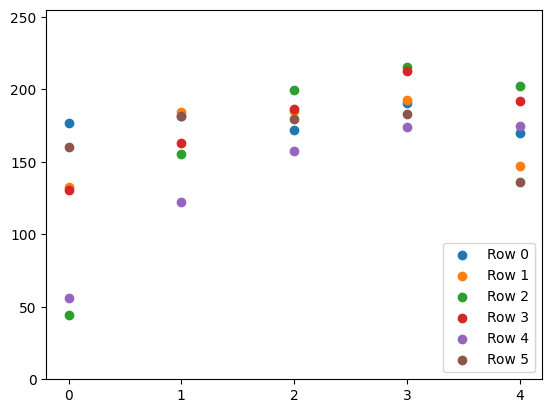

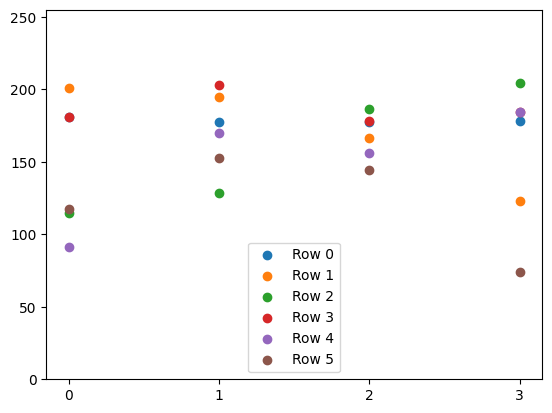

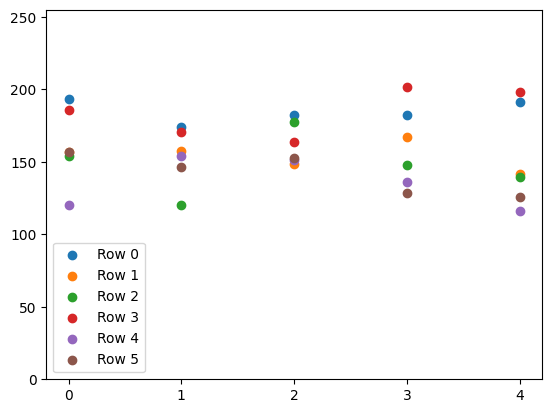

In [17]:
for df_ in [df_o,df_b,df_v]:
  x_values = range(len(df_.columns))
  for i, (_, row) in enumerate(df_.iterrows()):
      plt.scatter(x_values, row, label=f'Row {i}')
  # Set x-axis ticks and labels
  plt.xticks(x_values, df_.columns)
  # Set y-axis limits
  plt.ylim(0, 255)
  # Add legend
  plt.legend()
  # Show plot
  plt.show()

### Esta toma como cara-humana a cualquiera que caiga dentro del rango de los puntos.

In [18]:
listas_histograms = list(procesar_new_img("/content/Jubilado_1.jpg"))

histograms_names = ["Vertical", "Hist_ojos","Hist_boca"]
tiks_1 = []
tiks_false_1 = []

for df_,list_nuew_img in zip([df_v,df_o,df_b],listas_histograms):
  tiks = []
  tiks_false = []
  n = 0
  f = 0
  for i,col in zip(list_nuew_img,list(df_.columns)):
    if df_[col].min() <= i <= df_[col].max():
      n = n+1
      tiks.append(n)
    else:
      f = f+1
      tiks_false.append(f)
  tiks_1.append(tiks)
  tiks_false_1.append(tiks_false)

poisibilidades = []
for list_nuew_img,i,z in zip(listas_histograms,range(len(tiks_1)),histograms_names):
  posibilidad = len(tiks_1[i])/len(list_nuew_img)
  poisibilidades.append(posibilidad)
  print(posibilidad*100,"% ","según: ",z)


Vertical, Hist_ojos, Hist_boca
100.0 %  según:  Vertical
100.0 %  según:  Hist_ojos
100.0 %  según:  Hist_boca


### Esta toma como cara-humana a cualquiera que caiga dentro del rango min max del average de los puntos de la zona.

In [19]:
listas_histograms = list(procesar_new_img("/content/Jubilado_1.jpg"))

histograms_names = ["Vertical", "Hist_ojos","Hist_boca"]
tiks_1 = []
tiks_false_1 = []

for df_,list_nuew_img in zip([df_v,df_o,df_b],listas_histograms):
  tiks = []
  tiks_false = []
  n = 0
  f = 0
  for i,col in zip(list_nuew_img,list(df_.columns)):
    average = df_[col].mean()
    diff_max_min = (df_[col].max() - df_[col].min())/2
    average_top = average + diff_max_min
    average_bottom = average - diff_max_min
    if average_bottom <= i <= average_top:
      n = n+1
      tiks.append(n)
    else:
      f = f+1
      tiks_false.append(f)
  tiks_1.append(tiks)
  tiks_false_1.append(tiks_false)

poisibilidades = []
for list_nuew_img,i,z in zip(listas_histograms,range(len(tiks_1)),histograms_names):
  posibilidad = len(tiks_1[i])/len(list_nuew_img)
  poisibilidades.append(posibilidad)
  print(posibilidad*100,"% ","según: ",z)

print(sum(poisibilidades)/len(poisibilidades)*100, "% de probabilidades que sea una cara humana")

Vertical, Hist_ojos, Hist_boca
100.0 %  según:  Vertical
80.0 %  según:  Hist_ojos
50.0 %  según:  Hist_boca
76.66666666666666 % de probabilidades que sea una cara humana
